<a href="https://colab.research.google.com/github/KathituCodes/Formula-1-Australia-Grand-Prix-Prediction/blob/main/Formula_1_2025_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set up the environment**

- Install the FastF1 package
- Import necessary libraries (FastF1, pandas, numpy, scikit-learn)
- Create and enable a cache directory to avoid redownloading FastF1 data during each run

In [1]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 14.2
    Uninstalling websockets-14.2:
      Successfully uninstalled websockets-14.2


In [2]:
# Load the necessary Libraries
import os
import fastf1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
#Create cache to avoid redownloading the FastF1 data during each run
cache_dir = "f1_cache"

# Create the directory if it does not exist
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

# Enable caching
fastf1.Cache.enable_cache(cache_dir)

print("Cache enabled successfully!")

Cache enabled successfully!


# **Load historical race data**

- Load the 2024 Australian Grand Prix race session (3rd race of 2024)
- Examine the session results data structure

In [4]:
# Load FastF1 2024 Australian GP race session
session_2024 = fastf1.get_session(2024, 3, "R") #Australian GP was the 3rd race of 2024
session_2024.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
DEBUG:fastf1.ergast:Failed to parse timestamp '-1:57:37.891' in Ergastresponse.
req            INFO 	No cached data found for session_status_

# **Prepare 2025 qualifying data**

- Create a DataFrame with 2025 qualifying information (drivers, qualifying times, grid positions)
- Convert qualifying lap times from string format (MM.sss) to seconds
- Map full driver names to FastF1 three-letter codes

In [6]:
#session_2024.weather()
session_2024.results.info()
session_2024.results.head(15)

<class 'fastf1.core.SessionResults'>
Index: 19 entries, 55 to 1
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   DriverNumber        19 non-null     object         
 1   BroadcastName       19 non-null     object         
 2   Abbreviation        19 non-null     object         
 3   DriverId            19 non-null     object         
 4   TeamName            19 non-null     object         
 5   TeamColor           19 non-null     object         
 6   TeamId              19 non-null     object         
 7   FirstName           19 non-null     object         
 8   LastName            19 non-null     object         
 9   FullName            19 non-null     object         
 10  HeadshotUrl         19 non-null     object         
 11  CountryCode         19 non-null     object         
 12  Position            19 non-null     float64        
 13  ClassifiedPosition  19 non-null     object 

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,1.0,1,2.0,NaT,NaT,NaT,0 days 01:20:26.843000,Finished,25.0
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,2.0,2,4.0,NaT,NaT,NaT,0 days 00:00:02.366000,Finished,19.0
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,GBR,3.0,3,3.0,NaT,NaT,NaT,0 days 00:00:05.904000,Finished,15.0
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,4.0,4,5.0,NaT,NaT,NaT,0 days 00:00:35.770000,Finished,12.0
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,5.0,5,6.0,NaT,NaT,NaT,0 days 00:00:56.309000,Finished,10.0
18,18,L STROLL,STR,stroll,Aston Martin,229971,aston_martin,Lance,Stroll,Lance Stroll,...,CAN,6.0,6,9.0,NaT,NaT,NaT,0 days 00:01:33.222000,Finished,8.0
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,7.0,7,8.0,NaT,NaT,NaT,0 days 00:01:35.601000,Finished,6.0
14,14,F ALONSO,ALO,alonso,Aston Martin,229971,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,8.0,8,10.0,NaT,NaT,NaT,0 days 00:01:40.992000,Finished,4.0
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,B6BABD,haas,Nico,Hulkenberg,Nico Hulkenberg,...,GER,9.0,9,16.0,NaT,NaT,NaT,0 days 00:01:44.553000,Finished,2.0
20,20,K MAGNUSSEN,MAG,kevin_magnussen,Haas F1 Team,B6BABD,haas,Kevin,Magnussen,Kevin Magnussen,...,DEN,10.0,10,14.0,NaT,NaT,NaT,0 days 00:00:04.081000,Lapped,1.0


In [7]:
# 2025 Qualifying Data
qualifying_2025 = pd.DataFrame({
    "Driver": [
        "Lando Norris", "Oscar Piastri", "Max Verstappen", "George Russell", "Yuki Tsunoda",
        "Alexander Albon", "Charles Leclerc", "Lewis Hamilton", "Pierre Gasly", "Carlos Sainz",
        "Fernando Alonso", "Lance Stroll"
    ],
    "FinalQualifyingTime": [
        "1:15.096", "1:15.180", "1:15.481", "1:15.546", "1:15.670",
        "1:15.737", "1:15.755", "1:15.973", "1:15.980", "1:16.062",
        "1:16.453", "1:16.483"
    ],

    "GridPosition_2025": [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13
    ],
})

# Convert lap times to seconds
def convert_time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    minutes, seconds = map(float, time_str.split(":"))
    return minutes * 60 + seconds

qualifying_2025["QualifyingTime (s)"] = qualifying_2025["FinalQualifyingTime"].apply(convert_time_to_seconds)
qualifying_2025.drop(columns=["FinalQualifyingTime"], inplace=True)  # Drop original column

qualifying_2025

,Driver,GridPosition_2025,QualifyingTime (s)
0,Lando Norris,1,75.096
1,Oscar Piastri,2,75.180
2,Max Verstappen,3,75.481
3,George Russell,4,75.546
4,Yuki Tsunoda,5,75.670
5,Alexander Albon,6,75.737
6,Charles Leclerc,7,75.755
7,Lewis Hamilton,8,75.973
8,Pierre Gasly,9,75.980
9,Carlos Sainz,10,76.062


In [8]:
# Map full names to FastF1 3-letter codes
driver_mapping = {
    "Lando Norris": "NOR", "Oscar Piastri": "PIA", "Max Verstappen": "VER", "George Russell": "RUS",
    "Yuki Tsunoda": "TSU", "Alexander Albon": "ALB", "Charles Leclerc": "LEC", "Lewis Hamilton": "HAM",
    "Pierre Gasly": "GAS", "Carlos Sainz": "SAI", "Isack Hadjar": "HAD", "Fernando Alonso": "ALO",
    "Lance Stroll": "STR", "Jack Doohan": "DOO", "Gabriel Bortoleto": "BOR", "Andrea Kimi Antonelli": "ANT",
    "Nico Hulkenberg": "HUL", "Liam Lawson": "LAW", "Esteban Ocon": "OCO", "Oliver Bearman": "BEA"
}

qualifying_2025["DriverCode"] = qualifying_2025["Driver"].map(driver_mapping)

qualifying_2025

,Driver,GridPosition_2025,QualifyingTime (s),DriverCode
0,Lando Norris,1,75.096,NOR
1,Oscar Piastri,2,75.180,PIA
2,Max Verstappen,3,75.481,VER
3,George Russell,4,75.546,RUS
4,Yuki Tsunoda,5,75.670,TSU
5,Alexander Albon,6,75.737,ALB
6,Charles Leclerc,7,75.755,LEC
7,Lewis Hamilton,8,75.973,HAM
8,Pierre Gasly,9,75.980,GAS
9,Carlos Sainz,10,76.062,SAI


In [9]:
session_2024.laps.info()

<class 'fastf1.core.Laps'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                998 non-null    timedelta64[ns]
 1   Driver              998 non-null    object         
 2   DriverNumber        998 non-null    object         
 3   LapTime             995 non-null    timedelta64[ns]
 4   LapNumber           998 non-null    float64        
 5   Stint               998 non-null    float64        
 6   PitOutTime          37 non-null     timedelta64[ns]
 7   PitInTime           37 non-null     timedelta64[ns]
 8   Sector1Time         977 non-null    timedelta64[ns]
 9   Sector2Time         996 non-null    timedelta64[ns]
 10  Sector3Time         995 non-null    timedelta64[ns]
 11  Sector1SessionTime  972 non-null    timedelta64[ns]
 12  Sector2SessionTime  996 non-null    timedelta64[ns]
 13  Sector3SessionTime  995 non-null    timedelta6

# **Process 2024 race data**

- Extract lap times, lap numbers, and tire compounds from the 2024 session
- Convert lap times to seconds
- Extract grid positions from 2024 race results



## **Merge datasets**

- Combine 2025 qualifying data with 2024 race data using driver codes as the key

In [10]:
# Extract lap times, grid position, lap number, and tire compound from 2024 session
laps_2024 = session_2024.laps[["Driver", "LapTime", "LapNumber", "Compound"]].copy()

# Convert LapTime to seconds
laps_2024.dropna(subset=["LapTime"], inplace=True)
laps_2024["LapTime (s)"] = laps_2024["LapTime"].dt.total_seconds()

# Extract grid position from 2024 race results
grid_positions_2024 = session_2024.results[["Abbreviation", "GridPosition"]].copy()
grid_positions_2024.rename(columns={"GridPosition": "GridPosition_2024"}, inplace=True)  # Rename column for clarity

# Merge lap times with grid position from last year's race
laps_2024 = laps_2024.merge(grid_positions_2024, left_on="Driver", right_on="Abbreviation", how="left")
laps_2024.drop(columns=["Abbreviation"], inplace=True)  # Drop duplicate driver column

# Merge 2025 Qualifying Data with 2024 Race Data
merged_data = qualifying_2025.merge(laps_2024, left_on="DriverCode", right_on="Driver", how="left")

# Display the updated dataframe
merged_data.head()

merged_data.head()

,Driver_x,GridPosition_2025,QualifyingTime (s),DriverCode,Driver_y,LapTime,LapNumber,Compound,LapTime (s),GridPosition_2024
0,Lando Norris,1,75.096,NOR,NOR,0 days 00:01:29.784000,1.0,MEDIUM,89.784,3.0
1,Lando Norris,1,75.096,NOR,NOR,0 days 00:01:23.183000,2.0,MEDIUM,83.183,3.0
2,Lando Norris,1,75.096,NOR,NOR,0 days 00:01:22.656000,3.0,MEDIUM,82.656,3.0
3,Lando Norris,1,75.096,NOR,NOR,0 days 00:01:22.609000,4.0,MEDIUM,82.609,3.0
4,Lando Norris,1,75.096,NOR,NOR,0 days 00:01:22.685000,5.0,MEDIUM,82.685,3.0


# **Build and train prediction model**

- Prepare features (qualifying time, grid position) and target variable (lap time)
- Split data into training and testing sets
- Train a Gradient Boosting Regressor model

**Make predictions for 2025:**

- Use the trained model to predict lap times for the 2025 Australian GP
- Display the predicted 2025 standings


**Evaluate model performance:**

- Calculate Mean Absolute Error (MAE) to assess prediction accuracy

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = merged_data[["QualifyingTime (s)", "GridPosition_2025"]]
y = merged_data["LapTime (s)"]

# Train Gradient Boosting Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, random_state=39)
model.fit(X_train, y_train)

# Predict using 2025 data
predicted_lap_times = model.predict(qualifying_2025[["QualifyingTime (s)", "GridPosition_2025"]])
qualifying_2025["PredictedRaceTime (s)"] = predicted_lap_times

# Display final predictions
print("\n Predicted 2025 Australian GP Standings\n")
print(qualifying_2025[["Driver", "PredictedRaceTime (s)"]])

# Evaluate Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("\nModel Error (MAE): {:.2f} seconds".format(mae))


 Predicted 2025 Australian GP Standings

             Driver  PredictedRaceTime (s)
0      Lando Norris              82.713339
1     Oscar Piastri              84.328823
2    Max Verstappen              85.144804
3    George Russell              83.889971
4      Yuki Tsunoda              84.417393
5   Alexander Albon              84.642920
6   Charles Leclerc              83.080425
7    Lewis Hamilton              86.096218
8      Pierre Gasly              85.541001
9      Carlos Sainz              83.622659
10  Fernando Alonso              83.871622
11     Lance Stroll              85.286795

Model Error (MAE): 3.47 seconds


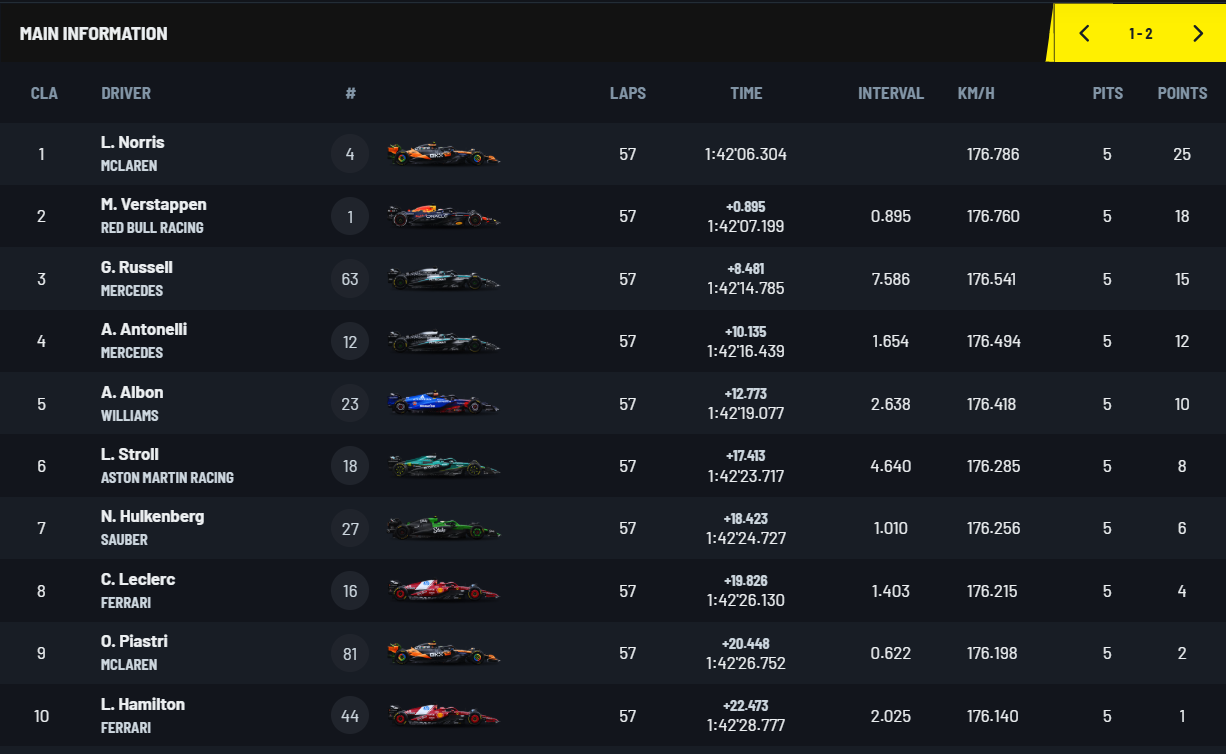

Looking at the actual 2025 Australian Grand Prix results compared to the model's predictions, there are several interesting observations:

### Key Comparisons:

1. **Lando Norris**:
   - Prediction: Fastest race time (1st)
   - Actual: Race winner (1st)
   - The model correctly predicted Norris would have the strongest performance.

2. **Oscar Piastri**:
   - Prediction: 3rd fastest time
   - Actual: 9th place, over 20 seconds behind the leader
   - This is a significant miss - the model expected both McLarens to dominate.

3. **Max Verstappen**:
   - Prediction: 8th fastest (85.14s)
   - Actual: 2nd place, only 0.895 seconds behind Norris
   - The model drastically underestimated Verstappen's pace.

4. **George Russell**:
   - Prediction: 4th fastest
   - Actual: 3rd place
   - Relatively accurate prediction for Russell.

5. **Charles Leclerc**:
   - Prediction: 5th fastest
   - Actual: 8th place
   - The model overestimated Ferrari's performance.

6. **Alexander Albon**:
   - Prediction: Lower performance (84.64s)
   - Actual: Strong 5th place finish
   - The model significantly underestimated Williams' pace.

7. **Lance Stroll**:
   - Prediction: 85.28s (near bottom)
   - Actual: 6th place
   - Another significant underestimation.

8. **Driver Presence**:
   - The model didn't account for Andrea Kimi Antonelli (finished 4th) and Nico Hulkenberg (finished 7th)
   - Some predicted drivers like Yuki Tsunoda and Pierre Gasly don't appear in the top 10 actual results.

### Overall Analysis:

1. **Accuracy**: The model correctly predicted Norris as the winner and had Russell in a similar position, but missed significantly on other drivers.

2. **Team Performance**:
   - McLaren: Split results (1st and 9th) rather than the predicted dominant 1-3 positions
   - Red Bull: Much stronger than predicted
   - Mercedes: Generally accurately predicted
   - Ferrari: Overestimated their performance
   - Williams: Significantly underestimated

3. **Model Limitations**:
   - The 3.47 second MAE (Mean Absolute Error) proved significant, as F1 races are often decided by fractions of a second
   - The model failed to account for race dynamics, strategy, and the many variables that affect actual race performance
   - Driver lineup changes weren't accurately accounted for

These discrepancies highlight the challenges in predicting F1 race outcomes, where countless factors including weather, strategy, car development, and even random events can significantly impact results beyond what qualifying times might suggest.